Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks (part 3)

In [1]:
import numpy as np
from scipy.optimize import minimize
import sympy
import matplotlib.pyplot as plt

In [2]:
sympy.init_printing(forecolor="black")

## Create a not-so-easy dataset

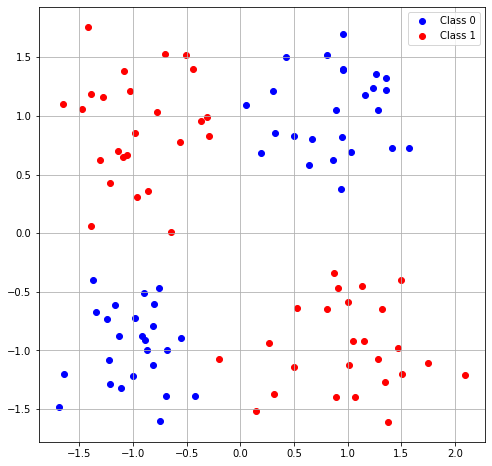

In [3]:
POINTS = 100
SCALE = 0.4
class0 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, -1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, 1],
        ]
    ),
    decimals=2,
)
class1 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, 1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, -1],
        ]
    ),
    decimals=2,
)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend()
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## Activation & Variables

In [4]:
def sigmoid(x):
    return 1 / (1 + sympy.exp(-x))

In [5]:
X1, X2 = sympy.symbols("x_1 x_2")
W = (w for w in sympy.symbols(" ".join([f"w_{t}" for t in range(999)])))

## Neural Network 1

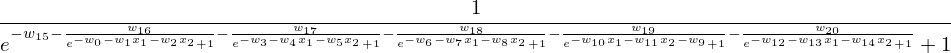

In [6]:
hidden = list()
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))

nn = next(W)
for p in hidden:
    nn += next(W) * p
nn = sigmoid(nn)
nn

### Define *loss* and optimize parameters

In [7]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)

In [11]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Symbols: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Symbols: [w_0, w_1, w_10, w_11, w_12, w_13, w_14, w_15, w_16, w_17, w_18, w_19, w_2, w_20, w_3, w_4, w_5, w_6, w_7, w_8, w_9]


In [12]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [  42.66317048  -41.7661217   -19.88820436  -13.85845865 -125.89899703
  -14.44899166  -37.5292109   -15.29300795   32.56434718  -11.57206405
   34.65090668  -41.0672563   -53.28646575  -69.95052393  -25.30971275
   17.14440101   11.58681756  -37.87959755  -34.85383585   26.48299617
  -20.99866426]


### Plot NN with fitted parameters

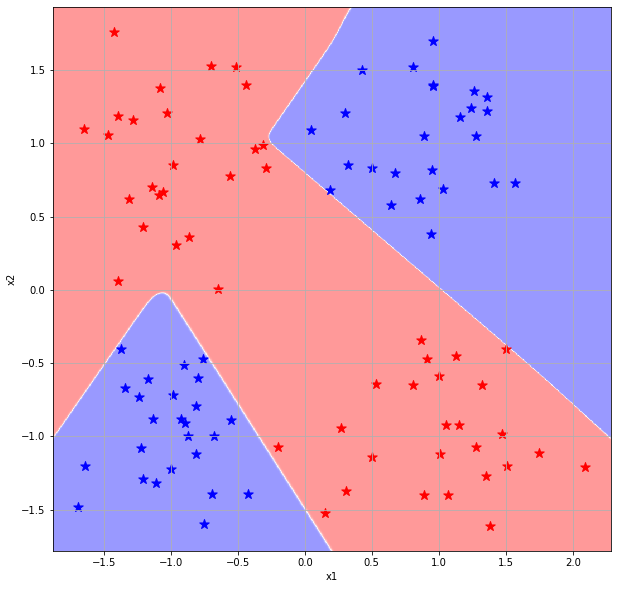

In [13]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")

## Neural Network 2

Just 1 *simple* perceptron, but with extra inputs 

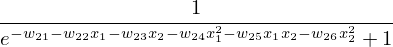

In [14]:
nn = sigmoid(next(W) + next(W) * X1 + next(W) * X2 + next(W) * X1**2 + next(W) * X1 * X2 + next(W) * X2**2)
nn

In [15]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Symbols: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Symbols: [w_21, w_22, w_23, w_24, w_25, w_26]


In [16]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [  3.00788136 -10.57962905 -12.3203755    4.60219503 -80.71957972
   5.59971402]


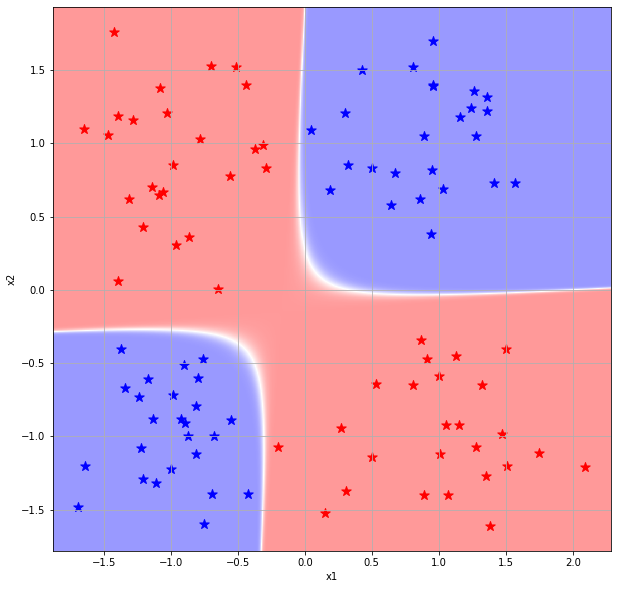

In [17]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")